# linear regression model using TensorFlow 2.0
we’re going to train a linear regression model using TensorFlow 2.0-compatible code

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The dependent variable is also called a label and independent variables are called features.

We’ll start by importing the necessary libraries. 

In [40]:
#Let’s import three, namely numpy, tensorflow, and matplotlib, as shown below:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Before starting our code, let’s check first our version of tensorflow

In [41]:
print(tf.__version__)

2.0.0


Our next step is to define a linear regression model. We know that the equation of a linear model is __y = mx + c__ where m is the __slope__ of the line and __c__ is __intercept__. So the parameters of this model are __m__ and __c__. In deep learning terms, we can call them as __weight__ and __bias__ respectively.

# define our Dataset

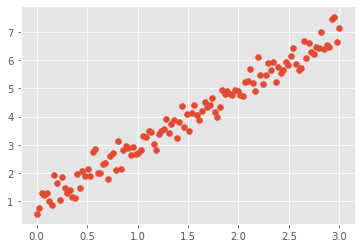

In [42]:
# Genrating random linear data 
# There will be 100 data points ranging from 0 to 10 
# actual weight = 2 and actual bias = 0.9
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3
plt.scatter(x, y, label="Input Dataset")
plt.show()

So let’s first define our model.

In [43]:
class Model:
    def __init__(self):
        self.w = tf.Variable(np.random.randn(), name = "W") 
        self.b = tf.Variable(np.random.randn(), name = "b") 

    def __call__(self, x):
        return self.w * x + self.b

as we can see our model has __W__ and __b__ attributes which will represent the slope and intercept respectively.

now we are going to plot our Input dataset and predicted from our untrained model.

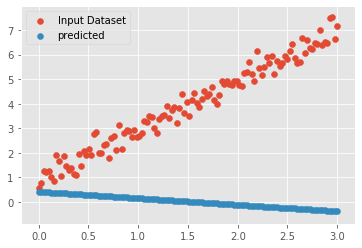

In [44]:
model = Model()
plt.scatter(x, y, label="Input Dataset")
plt.scatter(x, model(x), label="predicted")
plt.legend()
plt.show()

Accourdin this graph we can see that Clearly our model is way off. So we need to train the model. Let’s define a loss function that will tell how bad the model is. We’ll use mean squared error as our loss function.
The loss function takes two parameters: y (actual value of dependent variable) and pred (predicted value of dependent variable).

In [45]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Next step Now, we need to implement a function that will compute the gradient of the model parameters with respect to the loss.  Here, the __tf.GradientTape__ method is used for automatic differentiation, computing the gradient of a computation with respect to its input variables.Then, we multiply the gradient with a learning rate and subtract this result from the current value of our parameters (W and b).

In [46]:
def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    dW, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

Finally, we define a training loop which updates the weights and biases and also keeps track of the W and b.
we defined the numbers of epochs as 100 and using a for loop to train the model. Note that we’re printing the epoch count and loss for each epoch using that same for loop. We’ve used 0.01 for learning rate, and we’re calculating the loss in each epoch by calling our loss function inside the for loop as shown below.

In [47]:
l_Model = Model()
Ws, bs = [], []
epochs = 100
for epoch in range(epochs):
    Ws.append(l_Model.w.numpy()) # eager execution allows us to do this
    bs.append(model.b.numpy())

    current_loss = loss(y, l_Model(x))

    train(l_Model, x, y, lr=0.12)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch count {epoch}: Loss Value: {current_loss.numpy()}")

Epoch count 9: Loss Value: 0.11385250091552734
Epoch count 19: Loss Value: 0.10306255519390106
Epoch count 29: Loss Value: 0.09902884066104889
Epoch count 39: Loss Value: 0.0975208654999733
Epoch count 49: Loss Value: 0.09695708751678467
Epoch count 59: Loss Value: 0.09674633294343948
Epoch count 69: Loss Value: 0.0966675728559494
Epoch count 79: Loss Value: 0.09663811326026917
Epoch count 89: Loss Value: 0.09662710875272751
Epoch count 99: Loss Value: 0.09662298113107681


as we can see the loss value is decreasing as the epoch count is increasing.

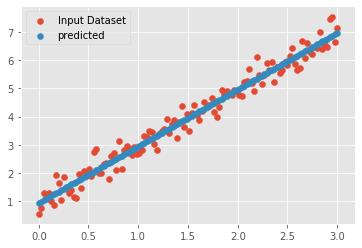

In [48]:
plt.scatter(x, y, label="Input Dataset")
plt.scatter(x, l_Model(x), label="predicted")
plt.legend()
plt.show()

In [49]:
l_Model.w.numpy(), l_Model.b.numpy()

(2.011707, 0.9329825)

In [50]:
RMSE=current_loss.numpy()

In [51]:
RMSE

0.09662298